Here we perform **LDA** on a documents containing questions from Economics so that we may find the most important topics from where questions have been asked, without physically going through all the questions.  

In [1]:
import os
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go

init_notebook_mode(connected=True) 

from gensim import corpora, models, similarities

import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.chdir("/home/arkaprava/Documents/Data")

In [3]:
import pandas as pd
data1 = pd.read_csv("Data1", sep='delimiter', header=None)
data2 = pd.read_csv("Data3", sep='delimiter', header=None)

In [4]:
data = pd.merge(data1, data2, how = 'outer')
data.head()

,0
0,A firm in a perfectly competitive market in th...
1,"In a competitive market, in equilibrium, total..."
2,A new technology for producing computer chips ...
3,Negative production externality is the result of
4,A lumpsum tax


In [5]:
range(len(data))

range(0, 59)

In [6]:
data[0][2]

'A new technology for producing computer chips invented by Intel Corporation is an example of: Which of the following is an example of public good'

In [7]:
corpus = []
a = []
for i in range(len(data1)):
        a = data[0][i]
        corpus.append(a)
        
corpus[0:5]

['A firm in a perfectly competitive market in the short run making losses but continuing in production. This implies that?',
 'In a competitive market, in equilibrium, total surplus can be increased by',
 'A new technology for producing computer chips invented by Intel Corporation is an example of: Which of the following is an example of public good',
 'Negative production externality is the result of',
 'A lumpsum tax']

In [62]:
import pandas as pd
#quest = pd.read_csv(data, encoding='latin1')
quest=data
quest.head(10)

,0
0,A firm in a perfectly competitive market in th...
1,"In a competitive market, in equilibrium, total..."
2,A new technology for producing computer chips ...
3,Negative production externality is the result of
4,A lumpsum tax
5,"the Stackelberg model of duopoly, if both the ..."
6,Purchasing Power Parity (PPP) is used in the c...
7,Difference between GDP and GNP is
8,"Suppose annual growth rate of Nominal GDP, Rea..."
9,Money multiplier determines


In [8]:
import gensim
import logging
import tempfile

TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

from gensim import corpora
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "/tmp" will be used to save temporary dictionary and corpus.


In [9]:
from nltk.corpus import stopwords
from string import punctuation

# remove common words and tokenize
list1 = ['RT','rt']
stoplist = stopwords.words('english') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

In [10]:
dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'quest.dict'))  # store the dictionary, for future reference
#print(dictionary)

2019-03-08 14:28:57,344 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-03-08 14:28:57,349 : INFO : built Dictionary(187 unique tokens: ['competitive', 'continuing', 'firm', 'implies', 'losses']...) from 32 documents (total 234 corpus positions)
2019-03-08 14:28:57,351 : INFO : saving Dictionary object under /tmp/quest.dict, separately None
2019-03-08 14:28:57,391 : INFO : saved /tmp/quest.dict


In [11]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'quest.mm'), corpus)  # store to disk, for later use

2019-03-08 14:28:59,527 : INFO : storing corpus in Matrix Market format to /tmp/quest.mm
2019-03-08 14:28:59,531 : INFO : saving sparse matrix to /tmp/quest.mm
2019-03-08 14:28:59,532 : INFO : PROGRESS: saving document #0
2019-03-08 14:28:59,536 : INFO : saved 32x187 matrix, density=3.710% (222/5984)
2019-03-08 14:28:59,539 : INFO : saving MmCorpus index to /tmp/quest.mm.index


In [12]:
from gensim import corpora, models, similarities

In [13]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

2019-03-08 14:29:03,975 : INFO : collecting document frequencies
2019-03-08 14:29:03,978 : INFO : PROGRESS: processing document #0
2019-03-08 14:29:03,980 : INFO : calculating IDF weights for 32 documents and 186 features (222 matrix non-zeros)


In [14]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors

In [15]:
total_topics = 5
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi


2019-03-08 14:29:12,119 : INFO : using symmetric alpha at 0.2
2019-03-08 14:29:12,121 : INFO : using symmetric eta at 0.2
2019-03-08 14:29:12,123 : INFO : using serial LDA version on this node
2019-03-08 14:29:12,124 : INFO : running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 32 documents, updating model once every 32 documents, evaluating perplexity every 32 documents, iterating 50x with a convergence threshold of 0.001000
2019-03-08 14:29:12,126 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-03-08 14:29:12,231 : INFO : -8.773 per-word bound, 437.6 perplexity estimate based on a held-out corpus of 32 documents with 234 words
2019-03-08 14:29:12,234 : INFO : PROGRESS: pass 0, at document #32/32
2019-03-08 14:29:12,291 : INFO : topic #0 (0.200): 0.030*"according" + 0.021*"manufacturing" + 0.021*"year" + 0.021*"domestic" + 0.021*"deficit" + 0.021*"money" + 0.0

In [16]:
lda.show_topics(total_topics,5)

[(0,
  '0.030*"according" + 0.021*"manufacturing" + 0.021*"year" + 0.021*"domestic" + 0.021*"deficit"'),
 (1,
  '0.030*"example" + 0.017*"following" + 0.017*"intel" + 0.017*"corporation" + 0.017*"invented"'),
 (2,
  '0.032*"investment" + 0.032*"tax" + 0.031*"increases" + 0.018*"according" + 0.018*"shape"'),
 (3,
  '0.036*"india" + 0.020*"public" + 0.020*"sector" + 0.020*"privatization" + 0.020*"manifest"'),
 (4,
  '0.027*"rate" + 0.019*"factor" + 0.019*"marginal" + 0.019*"country" + 0.019*"multiplier"')]

In [17]:
from collections import OrderedDict

data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}

In [18]:
import pandas as pd

df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(112, 5)
(5, 112)


In [19]:
df_lda

,(ppp),"2011,",2022,according,along,announced,behave,call,chips,collapsed,...,targeted,tax,technology,"theorem,",total,trade,two,unemployment,used,year
0,0.000000,0.011412,0.011407,0.030394,0.00000,0.011405,0.000000,0.000000,0.000000,0.000000,...,0.011408,0.000000,0.000000,0.000000,0.000000,0.011402,0.0114,0.000000,0.000000,0.020913
1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.016498,0.000000,0.016543,0.000000,...,0.000000,0.000000,0.016538,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.017789,0.01653,0.000000,0.000000,0.016681,0.000000,0.016236,...,0.000000,0.032389,0.000000,0.000000,0.000000,0.000000,0.0000,0.016257,0.000000,0.015997
3,0.015047,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.019605,0.000000,0.0000,0.000000,0.016491,0.000000
4,0.000000,0.000000,0.000000,0.010450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.010415,0.010425,0.000000,0.0000,0.000000,0.000000,0.000000


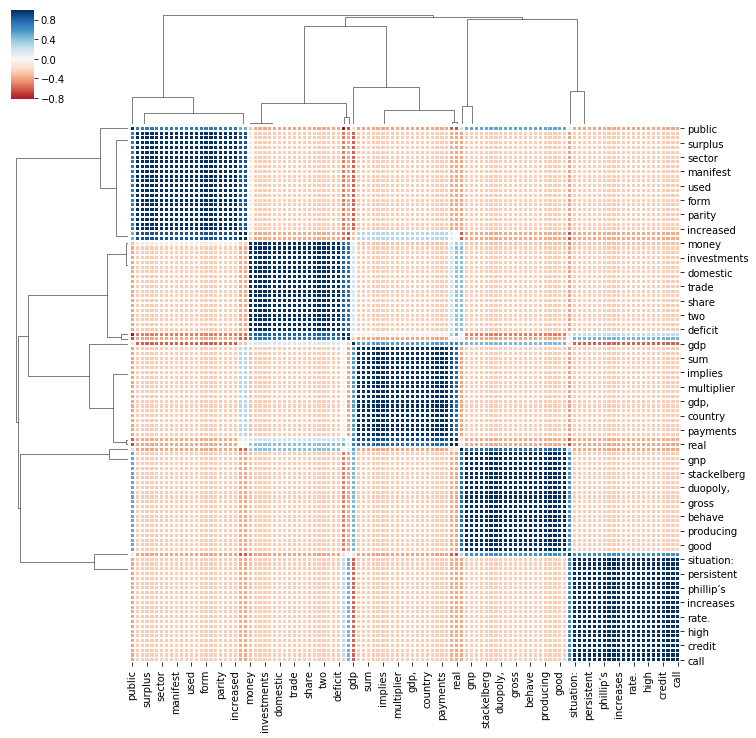

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

In [21]:
print(dictionary)
print(type(dictionary))

Dictionary(187 unique tokens: ['competitive', 'continuing', 'firm', 'implies', 'losses']...)
<class 'gensim.corpora.dictionary.Dictionary'>


In [22]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      147.882919  -45.608425       1        1  55.881927
3       98.105225   80.281960       2        1  14.106655
2      -35.188766  -45.216446       3        1  10.004410
1       52.588741 -148.792480       4        1  10.004118
0      -41.987759   90.380188       5        1  10.002891, topic_info=     Category      Freq           Term     Total  loglift  logprob
term                                                              
137   Default  0.000000          india  0.000000  30.0000  30.0000
69    Default  0.000000      according  0.000000  29.0000  29.0000
134   Default  0.000000     investment  0.000000  28.0000  28.0000
35    Default  0.000000            tax  0.000000  27.0000  27.0000
89    Default  0.000000      increases  0.000000  26.0000  26.0000
20    Default  0.000000        example  0.000000  25.0000  25.0000
99    Default  0.000000           year  0.000000  24.0000  24.0000
28    Default  0.000000         public  0.000000  23.0000  23.0000
67    Default  0.000000          money  0.000000  22.0000  22.0000
91    Default  0.000000        overall  0.000000  21.0000  21.0000
151   Default  0.000000  manufacturing  0.000000  20.0000  20.0000
121   Default  0.000000       domestic  0.000000  19.0000  19.0000
184   Default  0.000000        deficit  0.000000  18.0000  18.0000
103   Default  0.000000       interest  0.000000  17.0000  17.0000
179   Default  0.000000         sector  0.000000  16.0000  16.0000
178   Default  0.000000  privatization  0.000000  15.0000  15.0000
177   Default  0.000000       manifest  0.000000  14.0000  14.0000
48    Default  0.000000     difference  0.000000  13.0000  13.0000
174   Default  0.000000       dominant  0.000000  12.0000  12.0000
175   Default  0.000000    enterprises  0.000000  11.0000  11.0000
15    Default  0.000000        surplus  0.000000  10.0000  10.0000
12    Default  0.000000   equilibrium,  0.000000   9.0000   9.0000
176   Default  0.000000           form  0.000000   8.0000   8.0000
13    Default  0.000000      increased  0.000000   7.0000   7.0000
135   Default  0.000000     government  0.000000   6.0000   6.0000
136   Default  0.000000      important  0.000000   5.0000   5.0000
14    Default  0.000000        market,  0.000000   4.0000   4.0000
138   Default  0.000000        revenue  0.000000   3.0000   3.0000
49    Default  0.000000            gdp  0.000000   2.0000   2.0000
143   Default  0.000000        india’s  0.000000   1.0000   1.0000
...       ...       ...            ...       ...      ...      ...
149    Topic5  0.036513           2022  0.100891   1.2859  -4.4735
125    Topic5  0.036507            one  0.100883   1.2858  -4.4737
150    Topic5  0.036506      announced  0.100897   1.2857  -4.4737
152    Topic5  0.036506       national  0.100900   1.2856  -4.4737
159    Topic5  0.036506       deficits  0.100907   1.2856  -4.4737
154    Topic5  0.036497          share  0.100893   1.2855  -4.4740
122    Topic5  0.036499        exceeds  0.100911   1.2854  -4.4739
161    Topic5  0.036498          trade  0.100918   1.2852  -4.4739
124    Topic5  0.036489        observe  0.100905   1.2851  -4.4742
123    Topic5  0.036492    investments  0.100918   1.2851  -4.4741
127    Topic5  0.036490          would  0.100917   1.2850  -4.4742
158    Topic5  0.036490    contributed  0.100919   1.2850  -4.4742
162    Topic5  0.036491            two  0.100927   1.2850  -4.4741
118    Topic5  0.036482        holding  0.100960   1.2844  -4.4744
126    Topic5  0.036472       savings,  0.100944   1.2843  -4.4747
160    Topic5  0.036470          items  0.100964   1.2840  -4.4747
157    Topic5  0.036462        balance  0.100955   1.2839  -4.4749
70     Topic5  0.036465    consumption  0.100970   1.2838  -4.4748
116    Topic5  0.036459           cost  0.100977   1.2836  -4.4750
117    Topic5  0.036458         equals  0.100985   1.2835  -4.4750
